# **Import library**

In [19]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import math
import matplotlib.pyplot as plt
import graphviz

# **Read csv file**

In [20]:
df = pd.read_csv('dt_data.csv')
print(df)

       # Rank  Q1    Q2  Q3  Q4  Q5  Q6  Q7   Q8   Q9  Unnamed: 11
0      1    F   0   0.0   0   0   2   6   0  6.4  6.4          NaN
1      2    F   0   4.0   0   0   2   5   0  6.4  2.7          NaN
2      3    P   3   8.0   5   4   3   9   4  8.6  6.4          NaN
3      4    P   0  10.0   0   1   0   7   4  7.9  9.1          NaN
4      5    F   0   6.0   7   0   3   0   2  5.7  5.5          NaN
..   ...  ...  ..   ...  ..  ..  ..  ..  ..  ...  ...          ...
262  263    F   0   4.1   7   1   5   6   0  0.0  9.1          NaN
263  264    P   3   6.0   7   2   2   0   0  5.0  0.0          NaN
264  265    P   4   8.0   0   2   5   9   4  9.3  7.3          NaN
265  266    P   1   0.0   1   0   1  10   0  0.0  0.0          NaN
266  267    F   2   4.0   6   1   3   8   4  5.7  7.3          NaN

[267 rows x 12 columns]


# **Clean data - Remove NaN column**

In [21]:
df.drop('Unnamed: 11', axis=1, inplace=True)
print(df)

       # Rank  Q1    Q2  Q3  Q4  Q5  Q6  Q7   Q8   Q9
0      1    F   0   0.0   0   0   2   6   0  6.4  6.4
1      2    F   0   4.0   0   0   2   5   0  6.4  2.7
2      3    P   3   8.0   5   4   3   9   4  8.6  6.4
3      4    P   0  10.0   0   1   0   7   4  7.9  9.1
4      5    F   0   6.0   7   0   3   0   2  5.7  5.5
..   ...  ...  ..   ...  ..  ..  ..  ..  ..  ...  ...
262  263    F   0   4.1   7   1   5   6   0  0.0  9.1
263  264    P   3   6.0   7   2   2   0   0  5.0  0.0
264  265    P   4   8.0   0   2   5   9   4  9.3  7.3
265  266    P   1   0.0   1   0   1  10   0  0.0  0.0
266  267    F   2   4.0   6   1   3   8   4  5.7  7.3

[267 rows x 11 columns]


# **Define entropy function**

In [22]:
def getEntropy(Q):
  Q_col = df[Q]
  Q_unique = Q_col.unique()
  entropy_Q = 0

  for ele in Q_unique:
    occurrences = Q_col.value_counts()[ele]
    p = occurrences / len(Q_col)
    entropy_Q += -p * math.log2(p)
  return entropy_Q

In [23]:
for ele in ['Rank', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9']:
  entropy_Q = getEntropy(ele)
  print(f"Entropy({ele}) =", entropy_Q)

Entropy(Rank) = 0.9219957030944406
Entropy(Q1) = 2.5248962387450886
Entropy(Q2) = 4.132418142909147
Entropy(Q3) = 3.13737672780893
Entropy(Q4) = 2.9241869100202065
Entropy(Q5) = 3.01657876376289
Entropy(Q6) = 3.2029458689261694
Entropy(Q7) = 2.090453638138469
Entropy(Q8) = 3.4967234560100016
Entropy(Q9) = 3.2293908096090562


# **Define average entropy function**

In [24]:
def getEntropyHelper (Q, attr, attr_length):
  data = df[df[Q] == attr]
  rank_col = data['Rank']
  rank_unique = rank_col.unique()
  H = 0

  for ele in rank_unique:
    occurrences = rank_col.value_counts()[ele]
    p = occurrences / attr_length
    H += - p * math.log2(p)
  return H

def getAvgEntropy(Q):
  Q_col = df[Q]
  Q_unique = Q_col.unique()
  AE = 0

  for ele in Q_unique:
    occurrences = Q_col.value_counts()[ele]
    p = occurrences / len(Q_col)
    H = getEntropyHelper(Q, ele, occurrences)
    AE += p * H
  return AE

for ele in ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9']:
  avgEntropy_Q = getAvgEntropy(ele)
  print(f"Average Entropy({ele}) =", avgEntropy_Q)

Average Entropy(Q1) = 0.8643297071195146
Average Entropy(Q2) = 0.7616877890146895
Average Entropy(Q3) = 0.8462490281191665
Average Entropy(Q4) = 0.8243858908254258
Average Entropy(Q5) = 0.8487139346584045
Average Entropy(Q6) = 0.8144066635679746
Average Entropy(Q7) = 0.8150839597380262
Average Entropy(Q8) = 0.8279549628604717
Average Entropy(Q9) = 0.7877624431803373


# **Define information gain function**

In [25]:
def getInformationGain(Q):
  return getEntropy('Rank') - getAvgEntropy(Q)

for ele in ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9']:
  IG = getInformationGain(ele)
  print(f"Information Gain(Rank, {ele}) =", IG)

Information Gain(Rank, Q1) = 0.05766599597492594
Information Gain(Rank, Q2) = 0.1603079140797511
Information Gain(Rank, Q3) = 0.0757466749752741
Information Gain(Rank, Q4) = 0.09760981226901477
Information Gain(Rank, Q5) = 0.07328176843603607
Information Gain(Rank, Q6) = 0.10758903952646592
Information Gain(Rank, Q7) = 0.1069117433564144
Information Gain(Rank, Q8) = 0.09404074023396891
Information Gain(Rank, Q9) = 0.1342332599141033


# **Get H, AE and IG of all features**

In [26]:
def getAll (Q):
  return getEntropy(Q), getAvgEntropy(Q), getInformationGain(Q)

for ele in ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9']:
  H_Q, AE_Q, IG_Q = getAll(ele)
  print(f"Entropy({ele}) =", H_Q)
  print(f"Average Entropy({ele}) =", AE_Q)
  print(f"Information Gain(Rank, {ele}) =", IG_Q)
  print("==================================================")

Entropy(Q1) = 2.5248962387450886
Average Entropy(Q1) = 0.8643297071195146
Information Gain(Rank, Q1) = 0.05766599597492594
Entropy(Q2) = 4.132418142909147
Average Entropy(Q2) = 0.7616877890146895
Information Gain(Rank, Q2) = 0.1603079140797511
Entropy(Q3) = 3.13737672780893
Average Entropy(Q3) = 0.8462490281191665
Information Gain(Rank, Q3) = 0.0757466749752741
Entropy(Q4) = 2.9241869100202065
Average Entropy(Q4) = 0.8243858908254258
Information Gain(Rank, Q4) = 0.09760981226901477
Entropy(Q5) = 3.01657876376289
Average Entropy(Q5) = 0.8487139346584045
Information Gain(Rank, Q5) = 0.07328176843603607
Entropy(Q6) = 3.2029458689261694
Average Entropy(Q6) = 0.8144066635679746
Information Gain(Rank, Q6) = 0.10758903952646592
Entropy(Q7) = 2.090453638138469
Average Entropy(Q7) = 0.8150839597380262
Information Gain(Rank, Q7) = 0.1069117433564144
Entropy(Q8) = 3.4967234560100016
Average Entropy(Q8) = 0.8279549628604717
Information Gain(Rank, Q8) = 0.09404074023396891
Entropy(Q9) = 3.229390809

# **Get H, AE and IG of feature from user input**

In [27]:
feature_inp = input("Enter feature from Q1-Q9 to compute: ")

H_inp, AE_inp, IG_inp = getAll(feature_inp)

print(f"Entropy({feature_inp}) =", H_inp)
print(f"Average Entropy({feature_inp}) =", AE_inp)
print(f"Information Gain(Rank, {feature_inp}) =", IG_inp)

Enter feature from Q1-Q9 to compute: Q5
Entropy(Q5) = 3.01657876376289
Average Entropy(Q5) = 0.8487139346584045
Information Gain(Rank, Q5) = 0.07328176843603607


# **Split dataset and train model**

In [37]:
X = df.iloc[:, 2:11].values
y = df.iloc[:, 1].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

model = DecisionTreeClassifier(criterion="entropy", max_depth=7, min_samples_leaf=2)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=2)

# **Test and evaluate model**

In [38]:
y_pred = model.predict(X_test)

score = accuracy_score(y_test, y_pred)

print('Accuracy score =', score)
print("Model performance for Train set =", model.score(X_train, y_train))
print("Model performance for Test set =", model.score(X_test, y_test))

print()

print(classification_report(y_test, y_pred))

Accuracy score = 0.7222222222222222
Model performance for Train set = 0.92018779342723
Model performance for Test set = 0.7222222222222222

              precision    recall  f1-score   support

           F       0.57      0.67      0.62        18
           P       0.82      0.75      0.78        36

    accuracy                           0.72        54
   macro avg       0.69      0.71      0.70        54
weighted avg       0.74      0.72      0.73        54



In [39]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores: ", scores)
print("Average cross-validation score: ", scores.mean())

Cross-validation scores:  [0.64814815 0.66666667 0.69811321 0.73584906 0.56603774]
Average cross-validation score:  0.662962962962963


# **Get feature importances**

In [40]:
feature_names = df.columns[2:11]
importances = model.feature_importances_
imp = pd.Series(importances, index=feature_names)
print(imp)

Q1    0.085837
Q2    0.053960
Q3    0.077833
Q4    0.133723
Q5    0.171210
Q6    0.171379
Q7    0.137153
Q8    0.086628
Q9    0.082277
dtype: float64


# **Plot confusion matrix**

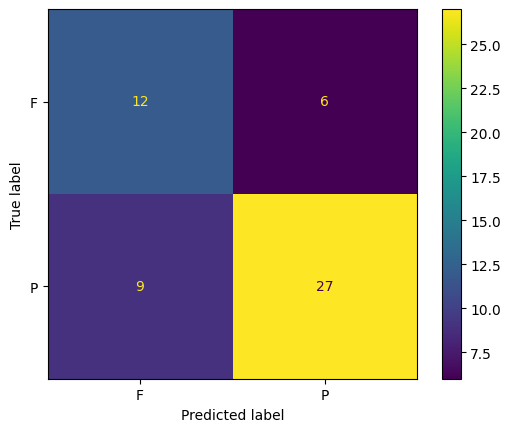

In [41]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

# **Plot decision tree**

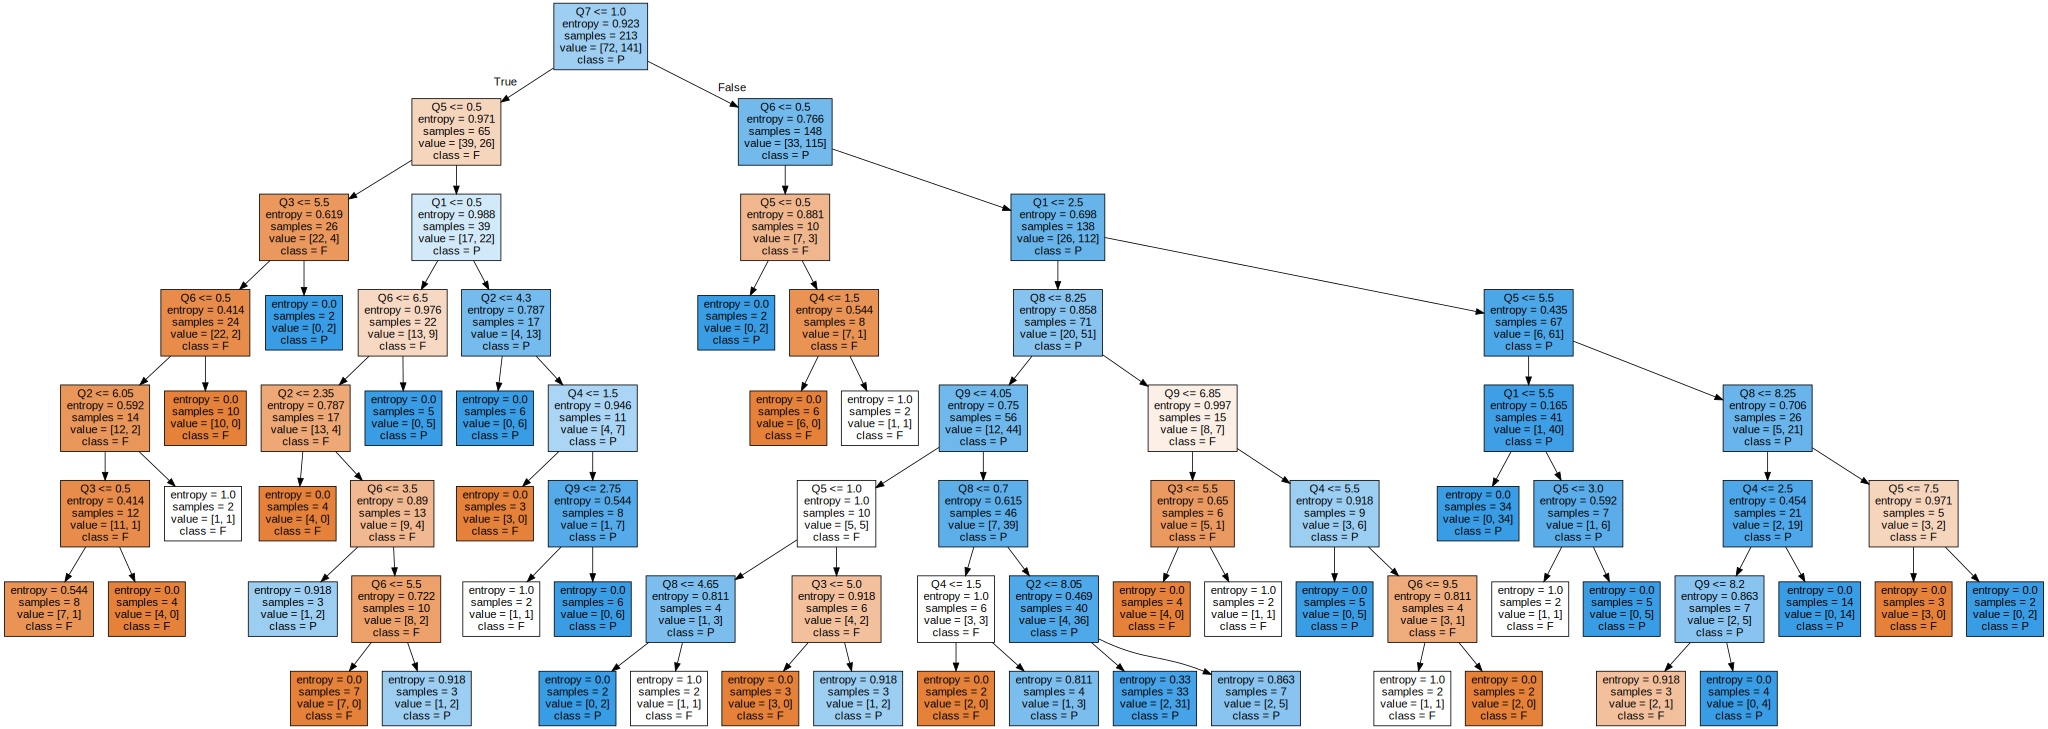

In [42]:
feature_names = df.columns[2:11]
class_names = ['F', 'P']

dot_data = export_graphviz(model, out_file=None, feature_names=feature_names, class_names=class_names, filled=True)
graph = graphviz.Source(dot_data)
graph